### This group project is about predicting the outbreak of west nile virus in Chicago, IL. This virus is transmitted to humans by mosquitos. Therefore, traps has been set to collect moquitos. The traps then were tested to see whether the collected mosquitos have the virus or not. The information gathered from the mosquito traps such as the type of the mosquito along with other data such as location, date, weather,  and whether there had been an spray of pesticide  to kill the mosquitos in that location are used to predict the presence of a west nile virus carrying mosquito in a trap.  
### The train set contains inforamtion about years 2007, 2009, 2011, and 2013 and is used to predict the presence of wnv in years of 2008, 2010, 2012, and 2014.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [133]:
#importing data, spray data for the test set (2008,2010,2012,2014) is not provided. Therefore, spray info is not used for the analysis
train = pd.read_csv('./assets/train.csv')
test =pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
#spray =pd.read_csv('./assets/spray.csv')
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

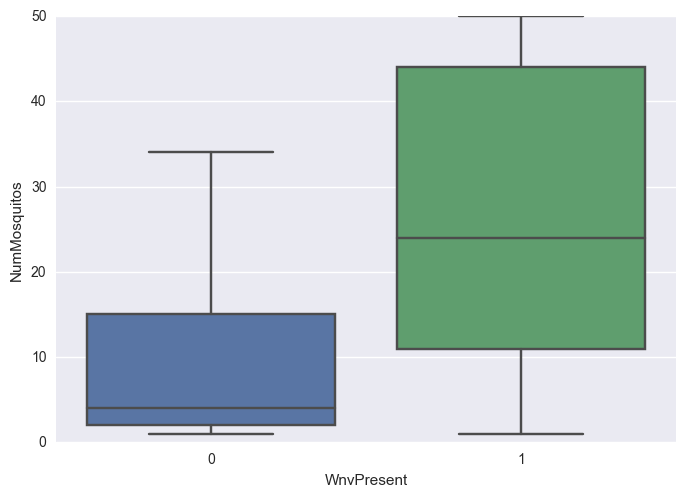

In [61]:
# Number of mosquitos in traps with or without wnv 
ax = sns.boxplot( y="NumMosquitos",x="WnvPresent", data=train,showfliers=False)
plt.show()

In [88]:
# Given the number of mosquitos in a trap, what is the probability of finding the virus in that trap! 
number_of_mosquito_probability = train.groupby(pd.cut(train['NumMosquitos'], range(0, 50,5)), as_index = False).WnvPresent.mean()
number_of_mosquito_probability['NumMosquitos']=[5,10,15,20,25,30,35,40,45]

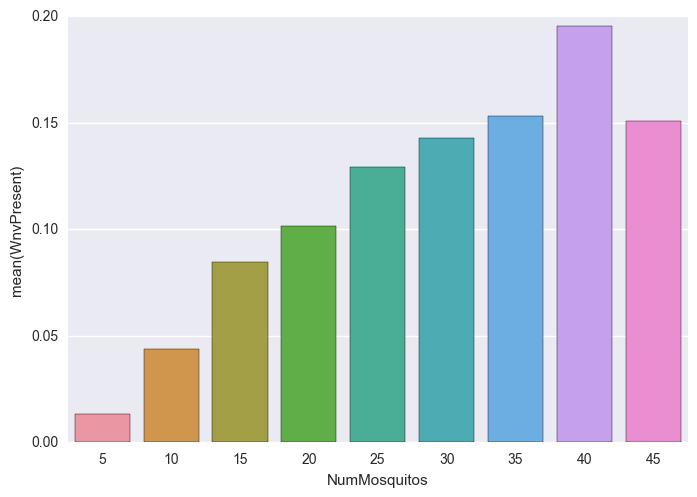

In [89]:
sns.barplot( x="NumMosquitos",y="WnvPresent", data=number_of_mosquito_probability)
plt.show()

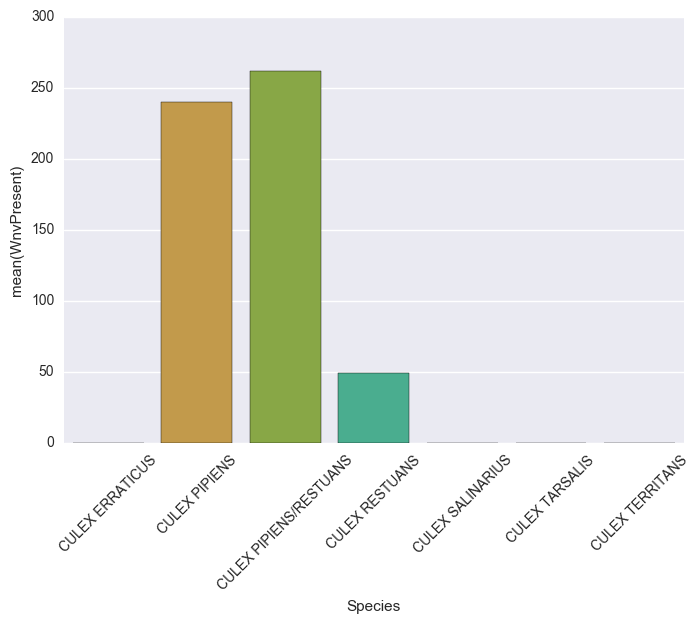

In [98]:
# effect of mosquito type on the presence of wnv
mosquito_type = train.groupby(train['Species'], as_index = False).WnvPresent.sum()
ax = sns.barplot( x="Species",y="WnvPresent", data=mosquito_type)
ax.set_xticklabels(mosquito_type.Species,rotation=45)
plt.show()

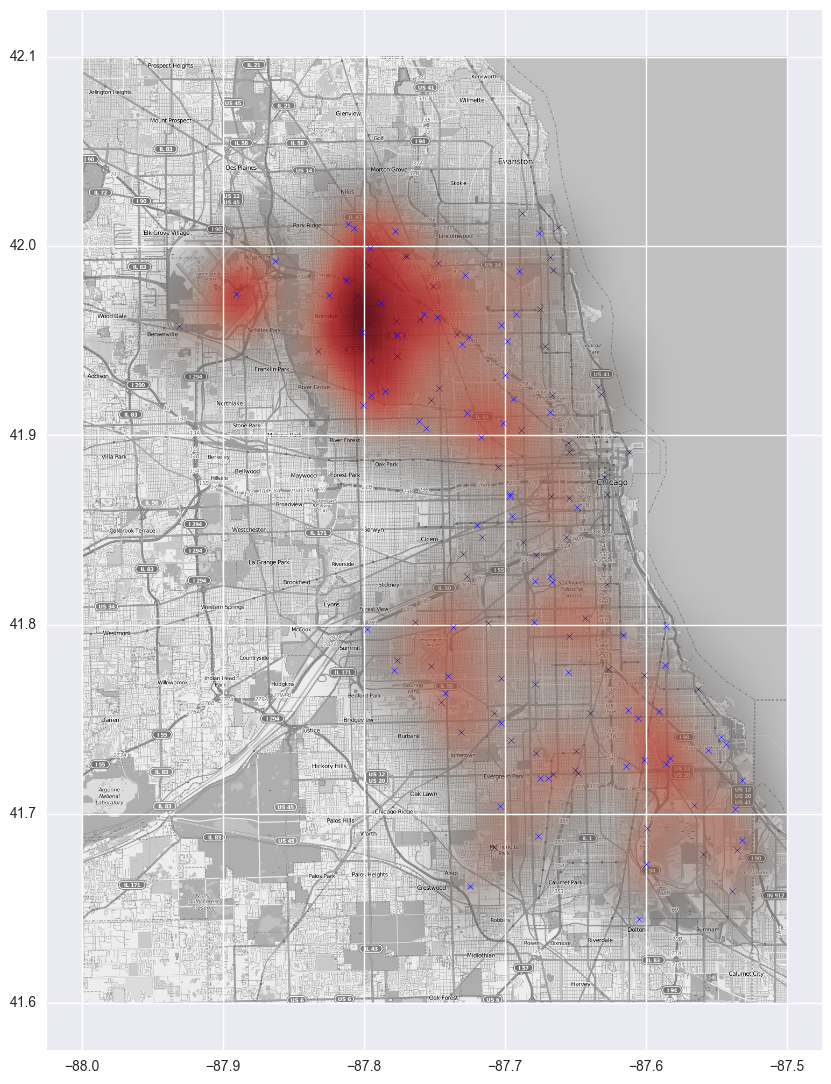

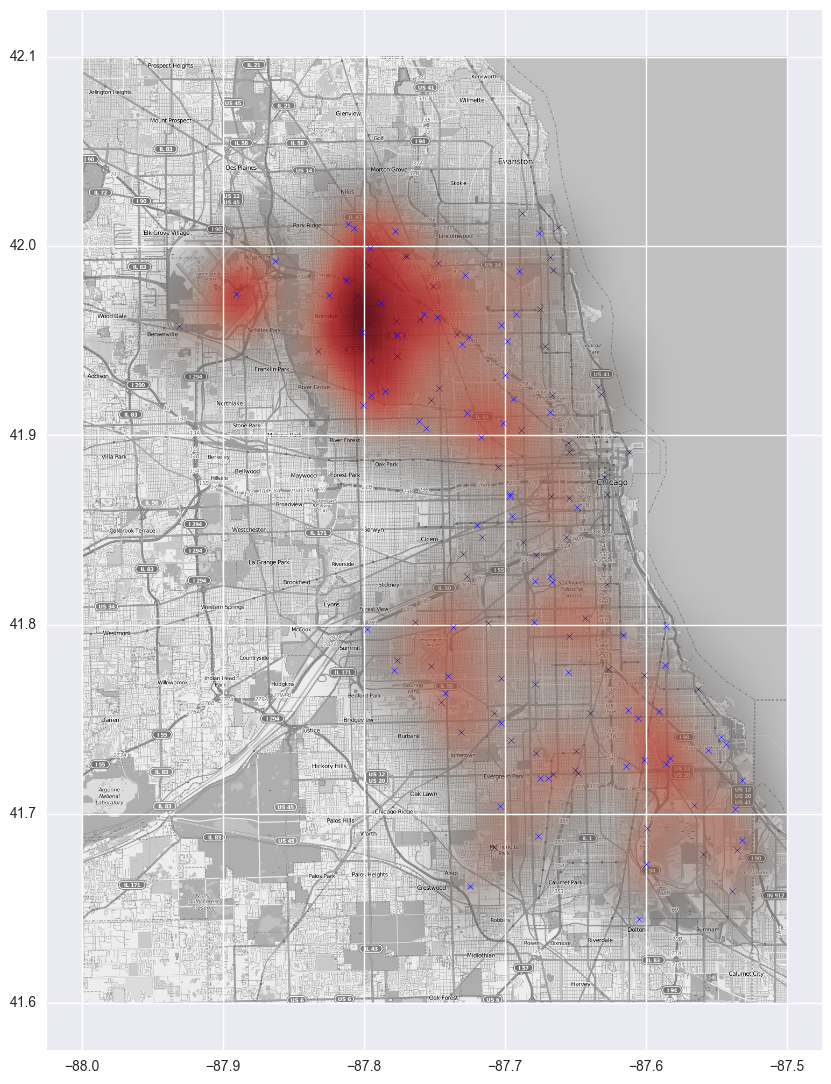

In [39]:
#This is from kaggle website as an example of using maps (https://www.kaggle.com/dchudz/predict-west-nile-virus/where-are-the-measurement-points)
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.show()
#plt.savefig('heatmap.png')

In [8]:
#EDA
print(train.shape)
print(train.head())
print(train.describe(include ='all'))
print(train.isnull().sum())

(10506, 12)
         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991        

In [130]:
#EDA
#M = missing data
#T = trace precipitation
print(weather.shape)
print(weather.head())
print(weather.describe(include ='all'))
print(weather.isnull().sum())
print(weather.dtypes)

(1472, 4)
         Date Tavg PrecipTotal  ResultSpeed
0  2007-05-01   67        0.00          1.7
2  2007-05-02   51        0.00         13.0
4  2007-05-03   56        0.00         11.7
6  2007-05-04   58           T         10.4
8  2007-05-05   60           T         11.7
              Date  Tavg PrecipTotal  ResultSpeed
count         1472  1472        1472  1472.000000
unique        1472    56         126          NaN
top     2013-06-02    73        0.00          NaN
freq             1    70         794          NaN
mean           NaN   NaN         NaN     6.987092
std            NaN   NaN         NaN     3.586353
min            NaN   NaN         NaN     0.100000
25%            NaN   NaN         NaN     4.400000
50%            NaN   NaN         NaN     6.400000
75%            NaN   NaN         NaN     9.100000
max            NaN   NaN         NaN    24.100000
Date           0
Tavg           0
PrecipTotal    0
ResultSpeed    0
dtype: int64
Date            object
Tavg            object

In [134]:
#only working with the data from Station No. 1 and using Tavg, total precipitation, and wind speed as variables
weather = weather[weather['Station']== 1]
weather = weather[['Date','Tavg','PrecipTotal','ResultSpeed']]


In [135]:
# Adding the weather data to the train and test data
train_add =train.join(weather.set_index('Date'), on='Date')
test_add = test.join(weather.set_index('Date'), on='Date')

In [139]:
# reformatting  Tavg to float
train_add['Tavg']=train_add.Tavg.astype(float)
# assigning 0 instead of T and reformatting PrecipTotal to float
train_add['PrecipTotal']= np.where(train_add['PrecipTotal']=='  T', '0.0', train_add['PrecipTotal'])
train_add['PrecipTotal']= train_add.PrecipTotal.astype(float)

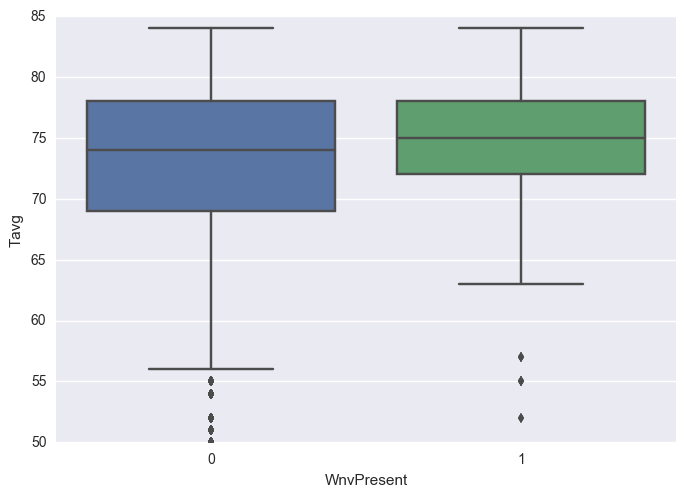

In [141]:
# Tavg in traps with or without wnv 
ax = sn.boxplot( y="Tavg",x="WnvPresent", data=train_add,showfliers=False)
plt.show()

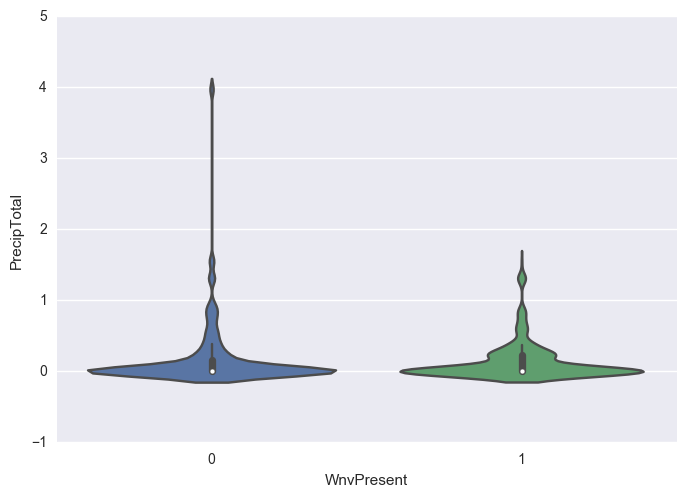

In [148]:
ax = sn.violinplot( y="PrecipTotal",x="WnvPresent", data=train_add)
plt.show()

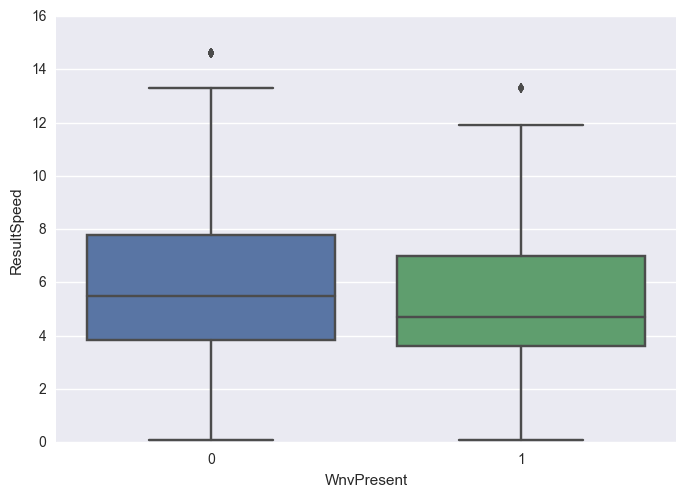

In [150]:
ax = sn.boxplot( y="ResultSpeed",x="WnvPresent", data=train_add)
plt.show()

#### Seems like wind spped, precipitation, and average temperature do not have a huge effect on wnv presence. However, location, number of mosquitos in the trap and the type of mosquitos have bigger effect.